In [ ]:
!pip install tensorflow-gpu
!pip install grpcio
!pip install keras
!pip install tensorflow
!pip install tensorflow-estimator

     |████████████████████████████████| 497.5 MB 23 kB/s 
     |████████████████████████████████| 462 kB 46.7 MB/s 


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import shutil
from tensorflow.keras.preprocessing import  image
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def make_dir(PATH):
  if not os.path.exists(PATH):
      os.mkdir(PATH)
      return PATH
  else:
    shutil.rmtree(PATH)
    os.mkdir(PATH)
    return PATH

In [ ]:
import random

def split_data(SOURCE='', TRAINING='', VALIDATION='', SPLIT_SIZE=0):
  data = os.listdir(SOURCE)
  random_data = random.sample(data, len(data))

  train_size = len(data)*SPLIT_SIZE

  for i, filename in enumerate(random_data):
    filepath = os.path.join(SOURCE, filename)
    if os.path.getsize(filepath) > 0:
      if i < train_size:
        shutil.copyfile(filepath, os.path.join(TRAINING, filename))
      else:
        shutil.copyfile(filepath, os.path.join(VALIDATION, filename))

In [ ]:
try:
    base_dir = '/content/drive/MyDrive/Dataset/'
    fruit_dir = make_dir(os.path.join(base_dir, 'fruit-dataset'))
    train_dir = make_dir(os.path.join(fruit_dir, 'train'))
    validation_dir = make_dir(os.path.join(fruit_dir, 'val'))
    test_dir = make_dir(os.path.join(fruit_dir, 'test'))

    train_fresh_apples_dir = make_dir(os.path.join(train_dir, 'Fresh Apples'))
    train_fresh_bananas_dir = make_dir(os.path.join(train_dir, 'Fresh Bananas'))
    train_fresh_oranges_dir = make_dir(os.path.join(train_dir, 'Fresh Oranges'))
    train_rotten_apples_dir = make_dir(os.path.join(train_dir, 'Rotten Apples'))
    train_rotten_bananas_dir = make_dir(os.path.join(train_dir, 'Rotten Bananas'))
    train_rotten_oranges_dir = make_dir(os.path.join(train_dir, 'Rotten Oranges'))

    validation_fresh_apples_dir = make_dir(os.path.join(validation_dir, 'Fresh Apples'))
    validation_fresh_bananas_dir = make_dir(os.path.join(validation_dir, 'Fresh Bananas'))
    validation_fresh_oranges_dir = make_dir(os.path.join(validation_dir, 'Fresh Oranges'))
    validation_rotten_apples_dir = make_dir(os.path.join(validation_dir, 'Rotten Apples'))
    validation_rotten_bananas_dir = make_dir(os.path.join(validation_dir, 'Rotten Bananas'))
    validation_rotten_oranges_dir = make_dir(os.path.join(validation_dir, 'Rotten Oranges'))

    test_fresh_apples_dir = make_dir(os.path.join(test_dir, 'Fresh Apples'))
    test_fresh_bananas_dir = make_dir(os.path.join(test_dir, 'Fresh Bananas'))
    test_fresh_oranges_dir = make_dir(os.path.join(test_dir, 'Fresh Oranges'))
    test_rotten_apples_dir = make_dir(os.path.join(test_dir, 'Rotten Apples'))
    test_rotten_bananas_dir = make_dir(os.path.join(test_dir, 'Rotten Bananas'))
    test_rotten_oranges_dir = make_dir(os.path.join(test_dir, 'Rotten Oranges'))

except OSError:
    pass

In [ ]:
train_main_dir = '/content/drive/MyDrive/Dataset/train'
test_main_dir = '/content/drive/MyDrive/Dataset/test'

In [ ]:
fapples_train_dir = os.path.join(train_main_dir, 'freshapples')
fbananas_train_dir = os.path.join(train_main_dir, 'freshbanana')
foranges_train_dir = os.path.join(train_main_dir, 'freshoranges')
rapples_train_dir = os.path.join(train_main_dir, 'rottenapples')
rbananas_train_dir = os.path.join(train_main_dir, 'rottenbanana')
roranges_train_dir = os.path.join(train_main_dir, 'rottenoranges')

fapples_test_dir = os.path.join(test_main_dir, 'freshapples')
fbananas_test_dir = os.path.join(test_main_dir, 'freshbanana')
foranges_test_dir = os.path.join(test_main_dir, 'freshoranges')
rapples_test_dir = os.path.join(test_main_dir, 'rottenapples')
rbananas_test_dir = os.path.join(test_main_dir, 'rottenbanana')
roranges_test_dir = os.path.join(test_main_dir, 'rottenoranges')

print('fapples_train images = ', len(os.listdir(fapples_test_dir)))

fapples_train images =  395


In [ ]:
SPLIT_SIZE = 0.67
split_data(fapples_train_dir, train_fresh_apples_dir, validation_fresh_apples_dir, SPLIT_SIZE)
split_data(fbananas_train_dir, train_fresh_bananas_dir, validation_fresh_bananas_dir, SPLIT_SIZE)
split_data(foranges_train_dir, train_fresh_oranges_dir, validation_fresh_oranges_dir, SPLIT_SIZE)
split_data(rapples_train_dir, train_rotten_apples_dir, validation_rotten_apples_dir, SPLIT_SIZE)
split_data(rbananas_train_dir, train_rotten_bananas_dir, validation_rotten_bananas_dir, SPLIT_SIZE)
split_data(roranges_train_dir, train_rotten_oranges_dir, validation_rotten_oranges_dir, SPLIT_SIZE)

SPLIT_SIZE = 1.0
split_data(fapples_test_dir, test_fresh_apples_dir, validation_fresh_apples_dir, SPLIT_SIZE)
split_data(fbananas_test_dir, test_fresh_bananas_dir, validation_fresh_bananas_dir, SPLIT_SIZE)
split_data(foranges_test_dir, test_fresh_oranges_dir, validation_fresh_oranges_dir, SPLIT_SIZE)
split_data(rapples_test_dir, test_rotten_apples_dir, validation_rotten_apples_dir, SPLIT_SIZE)
split_data(rbananas_test_dir, test_rotten_bananas_dir, validation_rotten_bananas_dir, SPLIT_SIZE)
split_data(roranges_test_dir, test_rotten_oranges_dir, validation_rotten_oranges_dir, SPLIT_SIZE)

In [ ]:
print(len(os.listdir('/content/drive/MyDrive/Dataset/fruit-dataset/test/Fresh Apples/')))

395


In [ ]:

# from tensorflow.keras.applications.inception_v3 import InceptionV3

# # Download Inception v3 weights to local machine
# !wget --no-check-certificate \
#     https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
#     -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

# pre_trained_model = InceptionV3(input_shape = (224, 224, 3), # Shape of our images
#                                 include_top = False, # Leave out the last fully connected layer
#                                 weights = 'imagenet')


# # Load Inception v3 weights into model
# local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
# pre_trained_model.load_weights(local_weights_file)


In [ ]:
#for layer in pre_trained_model.layers:
#  layer.trainable = False

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.995):
            print("\nCancelling training as model has reached 99% accuracy !")
            self.model.stop_training = True

In [ ]:
#last_layer = pre_trained_model.get_layer('mixed7')
#last_output = last_layer.output

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model

pre_trained_model = InceptionV3(input_shape=(150,150,3),
                                include_top=False)

for layer in pre_trained_model.layers:
    layer.trainable = False

x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(6, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2, #0.2, 0.5
    height_shift_range=0.2, #0.2, 0.5
    shear_range=0.2,
    zoom_range=[0.5, 1.0], # 0.2, 0.5, [0.5,1.0]
    rotation_range=90, #20, 40, 60, 90
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect' #nearest, reflect, wrap
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

# Flow training images in batches of 20 using train_datagen generator
# train_generator = train_datagen.flow_from_directory(train_dir,
#                                                     batch_size = 20,
#                                                     class_mode = 'categorical', 
#                                                     target_size = (224, 224))    

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    color_mode="rgb",
                                                    target_size=(150,150),
                                                    class_mode='categorical') 

# Flow validation images in batches of 20 using test_datagen generator
# validation_generator =  test_datagen.flow_from_directory( validation_dir,
#                                                           batch_size  = 20,
#                                                           class_mode  = 'categorical', 
#                                                           target_size = (224, 224))


validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         color_mode="rgb",
                                                         target_size=(150,150), 
                                                         class_mode='categorical')

Found 7704 images belonging to 6 classes.
Found 3789 images belonging to 6 classes.


In [ ]:
train_len = 0
for foldername in os.listdir('/content/drive/MyDrive/Dataset/fruit-dataset/train'):
    train_len = train_len + len(os.listdir(os.path.join('/content/drive/MyDrive/Dataset/fruit-dataset/train',foldername)))
    
val_len = 0
for foldername in os.listdir('/content/drive/MyDrive/Dataset/fruit-dataset/val'):
    val_len = val_len + len(os.listdir(os.path.join('/content/drive/MyDrive/Dataset/fruit-dataset/val',foldername)))

print(train_len)
print(val_len)

7704
3789


In [ ]:


# history = model.fit_generator(generator=train_generator,
#                               validation_data=validation_generator,
#                               steps_per_epoch=10,
#                               epochs=3,
#                               validation_steps=10,
#                               verbose=1,
#                               callbacks=[callbacks])

callbacks = myCallback()
history = model.fit(
    train_generator,
    steps_per_epoch=(train_len/32),
    epochs=10,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=(val_len/32)
)

Epoch 1/10
240/240 [==============================] - 609s 3s/step - loss: 2.7671 - accuracy: 0.8425 - val_loss: 0.2406 - val_accuracy: 0.9169
Epoch 2/10
240/240 [==============================] - 593s 2s/step - loss: 0.3114 - accuracy: 0.8965 - val_loss: 0.2023 - val_accuracy: 0.9264
Epoch 3/10
240/240 [==============================] - 594s 2s/step - loss: 0.3033 - accuracy: 0.8993 - val_loss: 0.2221 - val_accuracy: 0.9245
Epoch 4/10
240/240 [==============================] - 584s 2s/step - loss: 0.2629 - accuracy: 0.9110 - val_loss: 0.1929 - val_accuracy: 0.9261
Epoch 5/10
240/240 [==============================] - 586s 2s/step - loss: 0.2579 - accuracy: 0.9113 - val_loss: 0.2367 - val_accuracy: 0.9192
Epoch 6/10
240/240 [==============================] - 586s 2s/step - loss: 0.2392 - accuracy: 0.9198 - val_loss: 0.1648 - val_accuracy: 0.9433
Epoch 7/10
240/240 [==============================] - 589s 2s/step - loss: 0.2205 - accuracy: 0.9300 - val_loss: 0.1498 - val_accuracy: 0.9480

In [ ]:
import pickle



pickle.dump(model,open('model.pkl','wb+'))

INFO:tensorflow:Assets written to: ram://d51dd6eb-ecd2-41f0-9cb7-9bf8f14cea06/assets


In [ ]:

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms


In [ ]:
model.save('my_model.h5',"/content/drive/MyDrive/models")

In [ ]:
import shutil
shutil.copy('/content/my_model.h5','/content/drive/MyDrive/models')


'/content/drive/MyDrive/models/my_model.h5'

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/models/my_model.h5')


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                  target_size=(150, 150),
                                                  shuffle = False,
                                                  class_mode='categorical')

filenames = test_generator.filenames
nb_samples = len(filenames)

#loss, acc = new_model.evaluate(test_generator,steps = (nb_samples), verbose=1)
#print('accuracy test: ',acc)

Found 2705 images belonging to 6 classes.


In [ ]:
new_model = tf.keras.models.load_model('/content/my_model.h5')
new_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

Rotten Apple


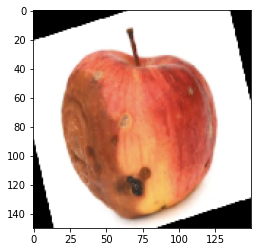

In [ ]:
predict_result = ""

path='/content/drive/MyDrive/Dataset/Random/rotated_by_15_Screen Shot 2018-06-07 at 2.16.54 PM.png'

img = image.load_img(path, color_mode="rgb", target_size=(150, 150), interpolation="nearest")
imgplot = plt.imshow(img)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255

images = np.vstack([img])
classes = new_model.predict(images, batch_size=10)

max = np.amax(classes[0])
if np.where(classes[0] == max)[0] == 0:
  predict_result='Fresh Apple'
elif np.where(classes[0] == max)[0] == 1:
  predict_result='Fresh Banana'
elif np.where(classes[0] == max)[0] == 2:
  predict_result='Fresh Orange'
elif np.where(classes[0] == max)[0] == 3:
  predict_result='Rotten Apple'
elif np.where(classes[0] == max)[0] == 4:
  predict_result='Rotten Banana'
else:
  predict_result='Rotten orange'

print(predict_result)

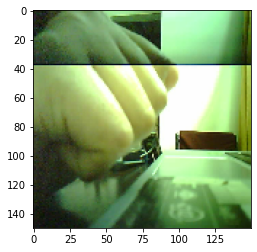

In [ ]:
count = 0
path1='/content/drive/MyDrive/ESP32-images-cam1/'+ str(count) +'.jpg'
img = image.load_img(path1, color_mode="rgb", target_size=(150, 150), interpolation="nearest")
imgplot = plt.imshow(img)

In [ ]:
import time

Output  0 :  Fresh Banana Fresh Banana Rotten Banana
Output  1 :  Rotten Banana Rotten Banana Fresh Apple
Output  2 :  Rotten Banana Rotten Banana Rotten Banana
Output  3 :  Fresh Banana Rotten Banana Rotten Banana
Output  4 :  Rotten Banana Rotten Banana Rotten Banana
Output  5 :  Fresh Apple Rotten Banana Fresh Banana


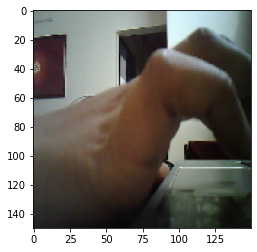

In [ ]:
count = 0
#add while True for continous loop
while count<6:
  #for cam1
  path1='/content/drive/MyDrive/ESP32-images-cam1/'+ str(count) +'.jpg'
  img1 = image.load_img(path1, color_mode="rgb", target_size=(150, 150), interpolation="nearest")
  imgplot1 = plt.imshow(img1)
  img1 = image.img_to_array(img1)
  img1 = np.expand_dims(img1, axis=0)
  img1 = img1/255

  images1 = np.vstack([img1])
  classes1 = new_model.predict(images1, batch_size=10)
  max1 = np.amax(classes1[0])
  if np.where(classes1[0] == max1)[0] == 0:
    result1='Fresh Apple'
  elif np.where(classes1[0] == max1)[0] == 1:
    result1='Fresh Banana'
  elif np.where(classes1[0] == max1)[0] == 2:
    result1='Fresh Orange'
  elif np.where(classes1[0] == max1)[0] == 3:
    result1='Rotten Apple'
  elif np.where(classes1[0] == max1)[0] == 4:
    result1='Rotten Banana'
  else:
    result1='Rotten orange'


  #for cam2
  path2='/content/drive/MyDrive/ESP32-images-cam2/'+ str(count) +'.jpg'
  img2 = image.load_img(path2, color_mode="rgb", target_size=(150, 150), interpolation="nearest")
  imgplot2 = plt.imshow(img2)
  img2 = image.img_to_array(img2)
  img2 = np.expand_dims(img2, axis=0)
  img2 = img2/255

  images2 = np.vstack([img2])
  classes2 = new_model.predict(images2, batch_size=10)
  max2 = np.amax(classes2[0])
  if np.where(classes2[0] == max2)[0] == 0:
    result2='Fresh Apple'
  elif np.where(classes2[0] == max2)[0] == 1:
    result2='Fresh Banana'
  elif np.where(classes2[0] == max2)[0] == 2:
    result2='Fresh Orange'
  elif np.where(classes2[0] == max2)[0] == 3:
    result2='Rotten Apple'
  elif np.where(classes2[0] == max2)[0] == 4:
    result2='Rotten Banana'
  else:
    result2='Rotten orange'


  #for cam3
  path3='/content/drive/MyDrive/ESP32-images-cam3/'+ str(count) +'.jpg'
  img3 = image.load_img(path3, color_mode="rgb", target_size=(150, 150), interpolation="nearest")
  imgplot3 = plt.imshow(img3)
  img3 = image.img_to_array(img3)
  img3 = np.expand_dims(img3, axis=0)
  img3 = img3/255

  images3 = np.vstack([img3])
  classes3 = new_model.predict(images3, batch_size=10)
  max3 = np.amax(classes3[0])
  if np.where(classes3[0] == max3)[0] == 0:
    result3='Fresh Apple'
  elif np.where(classes3[0] == max3)[0] == 1:
    result3='Fresh Banana'
  elif np.where(classes3[0] == max3)[0] == 2:
    result3='Fresh Orange'
  elif np.where(classes3[0] == max3)[0] == 3:
    result3='Rotten Apple'
  elif np.where(classes3[0] == max3)[0] == 4:
    result3='Rotten Banana'
  else:
    result3='Rotten orange'

  print("Output ",count,": ",result1,result2,result3)
  count = count + 1
  time.sleep(7)

In [ ]:
import urllib
import re
from bs4 import BeautifulSoup

a = urllib.request.urlopen("https://api.thingspeak.com/channels/1701489/fields/1.json?api_key=A7EKPZVIPX33ZKFZ&results=2")
select = repr(a.read())
select =select[300:]
pick=re.search('field1":"(.+?)"',select)
if pick:
  print(pick.group(1))


171
